<img style="float: right; margin: 10px 10px 15px 15px;" src="https://numex-blog.com/wp-content/uploads/2018/01/monte_carlo_price_1.png" width="400px" height="125px" />
# Simulación de precios futuros.

Proyecto por: Mario Abel García Verduzco 
- Repositorio remoto: https://github.com/marioabel96/Precios_Umbral


    

## Descripción General



>Pronosticaremos escenarios de evolución de precios para lo que resta del año en las criptomonedas con mayor capitalización de mercado y el dólar, suponiendo que los rendimientos diarios se distribuyen normalmente. Como la evolución de precios es aleatoria, utilizaremos la simulación Montecarlo para obtener probabilidades de que los  precios de cierre estén encima de un valor umbral para así, tomar decisiones en base a estas.




Cabe destacar que valoraremos los activos considerando solo sus precios y no sus características individuales en la realización de este análisis. 

Los casos que evaluaremos son:
  
 
  - [Bitcoin BTC](https://bitcoin.org/en/)
    
  - [Ethereum (ETH)](https://www.ethereum.org/)
    
  - [Ripple (XRP)](https://ripple.com/)
  
  - [Paridad USD/MXN](https://finance.yahoo.com/quote/USDMXN%3DX/chart?p=USDMXN%3DX#eyJpbnRlcnZhbCI6IndlZWsiLCJwZXJpb2RpY2l0eSI6MSwidGltZVVuaXQiOm51bGwsImNhbmRsZVdpZHRoIjo4LCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6ImxpbmUiLCJleHRlbmRlZCI6ZmFsc2UsIm1hcmtldFNlc3Npb25zIjp7fSwiYWdncmVnYXRpb25UeXBlIjoib2hsYyIsImNoYXJ0U2NhbGUiOiJsaW5lYXIiLCJwYW5lbHMiOnsiY2hhcnQiOnsicGVyY2VudCI6MSwiZGlzcGxheSI6IlVTRE1YTj1YIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJ0b3AiOjB9fSwic2V0U3BhbiI6e30sImxpbmVXaWR0aCI6Miwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiMwMDgxZjIiLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiJVU0RNWE49WCIsInN5bWJvbE9iamVjdCI6eyJzeW1ib2wiOiJVU0RNWE49WCJ9LCJwZXJpb2RpY2l0eSI6MSwiaW50ZXJ2YWwiOiJ3ZWVrIiwidGltZVVuaXQiOm51bGwsInNldFNwYW4iOnt9fV0sImN1c3RvbVJhbmdlIjpudWxsLCJzdHVkaWVzIjp7InZvbCB1bmRyIjp7InR5cGUiOiJ2b2wgdW5kciIsImlucHV0cyI6eyJpZCI6InZvbCB1bmRyIiwiZGlzcGxheSI6InZvbCB1bmRyIn0sIm91dHB1dHMiOnsiVXAgVm9sdW1lIjoiIzAwYjA2MSIsIkRvd24gVm9sdW1lIjoiI0ZGMzMzQSJ9LCJwYW5lbCI6ImNoYXJ0IiwicGFyYW1ldGVycyI6eyJ3aWR0aEZhY3RvciI6MC40NSwiY2hhcnROYW1lIjoiY2hhcnQifX19fQ%3D%3D) (Solo para dar perspectiva)
  
  
  Nuestro umbral será del 40%

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
%matplotlib inline

def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

# Descargamos datos...
# Instrumento: BITCOIN
ticker = 'BTC-USD'
# Fechas de interés (inicio 2017 y fin Mayo 2018)
start_date = '2017-01-01'
end_date = '2018-05-07'
# Función DataReader
closesbtc = get_historical_closes(ticker, start_date, end_date)

# Instrumento: Ethereum
ticker = 'ETH-USD'
# Fechas de interés (inicio 2017 y fin Mayo 2018)
start_date = '2017-01-01'
end_date = '2018-05-07'
# Función DataReader
closeseth = get_historical_closes(ticker, start_date, end_date)

# Instrumento: Ripple
ticker = 'XRP-USD'
# Fechas de interés (inicio 2017 y fin Mayo 2018)
start_date = '2017-01-01'
end_date = '2018-05-07'
# Función DataReader
closesxrp = get_historical_closes(ticker, start_date, end_date)


## Precios historicos (inicio 2017 - mayo 2018)

Antes de comenzar el siguiente anális considero importante mostrar los precios historicos de estos activos para mostrar gráficamente su relación.

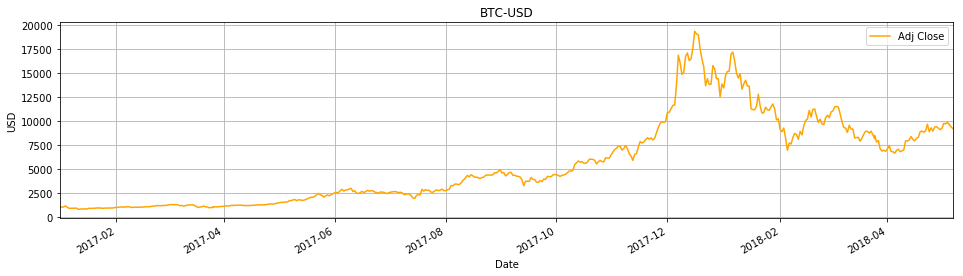

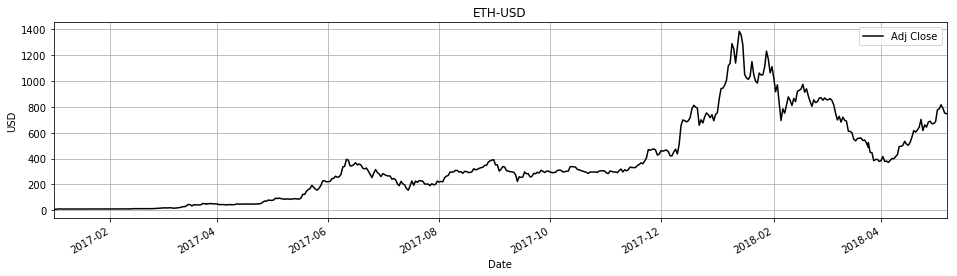

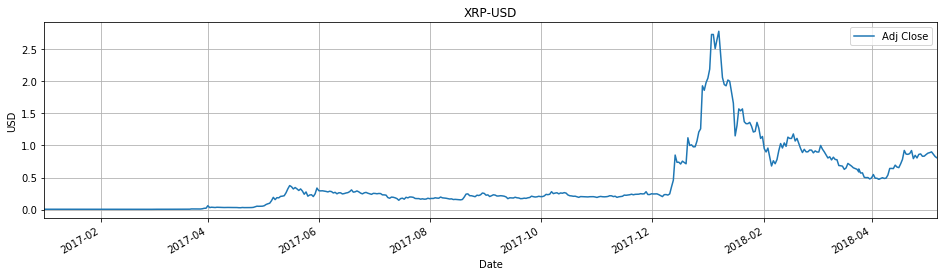

In [20]:
closesbtc.plot(figsize=(16,4),color='orange');
plt.ylabel('USD')
plt.title('BTC-USD')
plt.grid()

closeseth.plot(figsize=(16,4),color='k');
plt.ylabel('USD')
plt.title('ETH-USD')
plt.grid()

closesxrp.plot(figsize=(16,4));
plt.ylabel('USD')
plt.title('XRP-USD')
plt.grid()

## Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual

$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico.que es el que utilizaremos en este ejercicio:
$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.
Cabe mencionar que ambos, simple y logaritmico se aproximan.

>Además, supunemos que los rendimientos diarios son una variable aleatoria con distribución normal (que se caracteriza con su media y varianza). Por tanto obtenemos la media y desviación estandar muestrales. Hagamos una función que retorne lo anterior.

## Rendimientos diarios Gráficamente

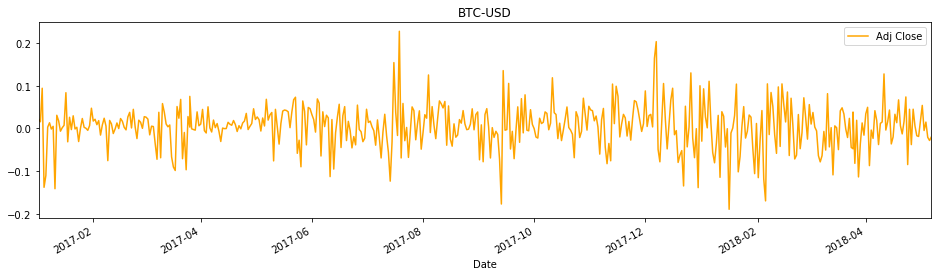

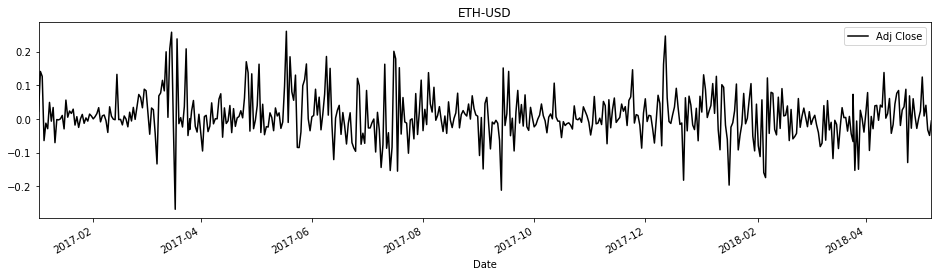

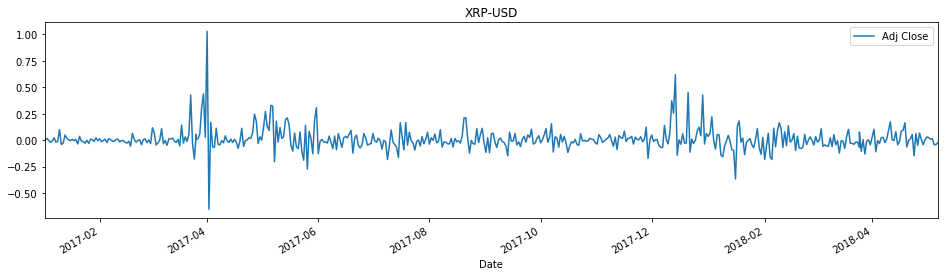

In [21]:
# Función para calcular los rendimientos diarios a partir de los precios de cierre...
# BTC
def calc_daily_returnsbtc(closesbtc):
    return np.log(closesbtc/closesbtc.shift(1)).dropna()
# ETH
def calc_daily_returnseth(closeseth):
    return np.log(closeseth/closeseth.shift(1)).dropna()
# XRP
def calc_daily_returnsxrp(closesxrp):
    return np.log(closesxrp/closesxrp.shift(1)).dropna()
# Calcular rendimientos diarios y graficarlos
daily_returnsbtc = calc_daily_returnsbtc(closesbtc)
daily_returnseth = calc_daily_returnseth(closeseth)
daily_returnsxrp = calc_daily_returnsxrp(closesxrp)
daily_returnsbtc.plot(figsize=(16,4),color='orange');
plt.title('BTC-USD')
daily_returnseth.plot(figsize=(16,4),color='k');
plt.title('ETH-USD')
daily_returnsxrp.plot(figsize=(16,4));
plt.title('XRP-USD')

## Necesitaremos los valores de mu (μ) y sigma (σ) para cada una de las simulaciones:

Entonces, suponemos que la diferencia logaritmica de los precios (rendimientos diarios) tiene una distribución normal.

>¿Cómo se caracteriza una [distribución normal](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal)?

In [22]:
# mu y sigma para BTC
mubtc=daily_returnsbtc.mean().values[0]
sigmabtc=daily_returnsbtc.std().values[0]

# mu y sigma para ETH
mueth=daily_returnseth.mean().values[0]
sigmaeth=daily_returnseth.std().values[0]

# mu y sigma para XRP
muxrp=daily_returnsxrp.mean().values[0]
sigmaxrp=daily_returnsxrp.std().values[0]


## Funciones para simulación de escenarios de Bitcoin (BTC), Ethereum (ETH) y Ripple (XRP)

In [23]:
# Función que simula varios escenarios de rendimientos diarios BTC
def daily_ret_simbtc(mubtc, sigmabtc, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigmabtc*np.random.randn(ndays, ntraj)+mubtc, index = dates)

# Función que simula varios escenarios de rendimientos diarios ETH
def daily_ret_simeth(mueth, sigmaeth, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigmaeth*np.random.randn(ndays, ntraj)+mueth, index = dates)

# Función que simula varios escenarios de rendimientos diarios XRP
def daily_ret_simxrp(muxrp, sigmaxrp, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigmaxrp*np.random.randn(ndays, ntraj)+muxrp, index = dates)

##  Simulamos los rendimientos 10,000 de escenarios por dia, para 238 dias finalizando el 2018 para cada criptomoneda 

Sí.. serán 9´520,000 simulaciones...

In [44]:

ndays = 238
ntraj = 10000
start_date = '2018-05-07'

#BTC
simretbtc = daily_ret_simbtc(mubtc, sigmabtc, ndays, ntraj, start_date)
#ETH
simreteth = daily_ret_simeth(mueth, sigmaeth, ndays, ntraj, start_date)
#XRP
simretxrp = daily_ret_simxrp(muxrp, sigmaxrp, ndays, ntraj, start_date)

##para mostrar escenarios (data-frame):
##simretbtc
##simreteth
##simretxrp

## Generación precios de cierre

Por tanto, para calcular los precios, tenemos:

$$\begin{align}
p_i&=p_{i-1}\exp(r_i)\\
p_{i+1}&=p_i\exp(r_{i+1})=p_{i-1}\exp(r_i)\exp(r_{i+1})=p_{i-1}\exp(r_i+r_{i+1})\\
&\vdots\\
p_{i+k}&=p_{i-1}\exp(r_i+\cdots+r_{i+k}).
\end{align}$$

Si hacemos $i=0$ en la última ecuación, tenemos que $p_{k}=p_{-1}\exp(r_0+\cdots+r_{k})$, donde $p_{-1}$ es el último precio reportado en Mid 2018.

Con los rendimientos, calculamos los precios de cierre...


In [25]:
## BTC
simdatabtc=(closesbtc.iloc[-1,:].values[0])*np.exp(simretbtc.cumsum())
## ETH
simdataeth=(closeseth.iloc[-1,:].values[0])*np.exp(simreteth.cumsum())
## BTC
simdataxrp=(closesxrp.iloc[-1,:].values[0])*np.exp(simretxrp.cumsum())

##para mostrar proyeciones (data-frame):
##ssimdatabtc
##simdataeth
##simdataxrp

## Proyección de precios de cierre Bitcoin (BTC) Mayo 2018 - Diciembre 2018
Sí.... el eje "y" son dólares......

In [30]:
## Solo para observar el valor máx  simulado en BTC
simdatabtc.values.max()

689652.80043863901

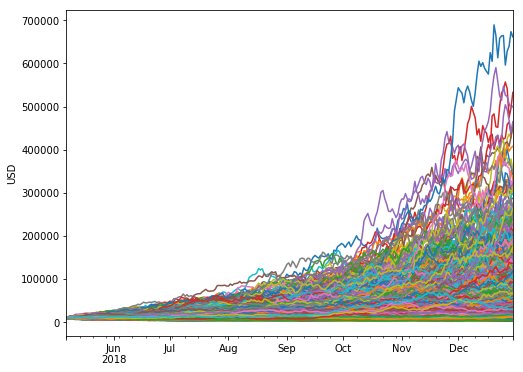

In [26]:
simdatabtc.plot(figsize=(8,6),legend=False);
plt.ylabel('USD')

## Probabilidad Precio-Umbral (40%)

Ya que tenemos muchos escenarios de precios proyectados, podemos ver varias cosas. Por ejemplo, ¿cuál es la probabilidad de que el precio de cierre sobrepase un umbral del 40% en algún momento?

Comenzamos en 9,000 USD por lo tanto nuestro umbral sera 12,600 USD

In [45]:
## Cálculo del precio umbral = 9000*1.40 = 12,600 USD

umbralbtc =9000*1.40
dates = pd.date_range('20180507',periods=ndays)
strikebtc = pd.DataFrame({'Strike':umbralbtc*np.ones(ndays)},index=dates)
simulbtc = pd.concat([simdatabtc.T,strike.T]).T

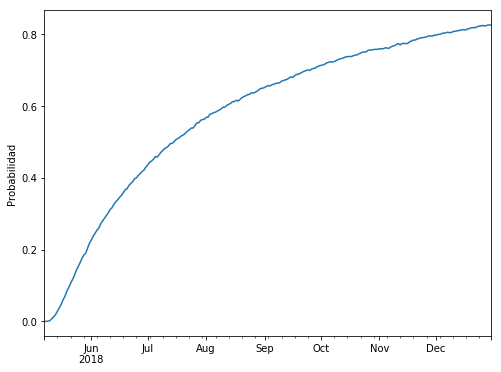

In [47]:
strikebtc = pd.DataFrame(12600*np.ones((ndays,ntraj)),index=dates)
countbtc = simdatabtc>strikebtc
probbtc = countbtc.T.sum()/ntraj
probbtc.plot(figsize=(8,6),legend=False);
plt.ylabel('Probabilidad')

Este gráfico nos muestra la probablidad de que BTC alcance el umbral a lo largo del tiempo.

Haremos lo mismo para cada moneda...

### Pero si crees que me la volé con la prediccion :[John McAfee says: By the end of 2020 Bitcoin will be worth  1 Million. Is he losing his bet?](https://bircoin.top/) 

"The founder of McAfee Antivirus. Some say he is a genius. Some say he is a lunatic. But that does not matter." 


![GitHub Logo](https://bircoin.top/tweet20171129.png)
![GitHub Logo](https://bircoin.top/tweet20170717.png)





## Proyección de precios de cierre Ethereum (ETH) Mayo 2018 - Diciembre 2018

Comenzamos en 725 USD por lo tanto nuestro umbral sera 1,015 USD

In [65]:
## Solo para observar el valor máx  simulado en ETH
simdataeth.values.max()

365234.1812485769

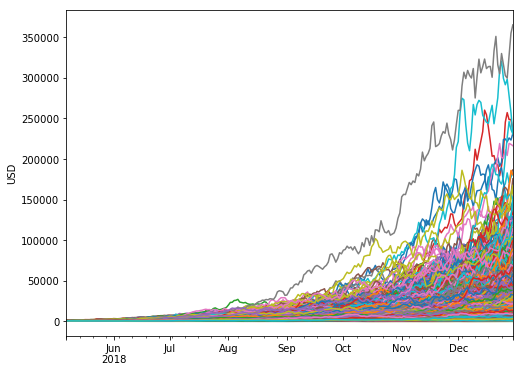

In [53]:
simdataeth.plot(figsize=(8,6),legend=False);
plt.ylabel('USD')

In [56]:
umbraleth =725*1.40
dates = pd.date_range('20180507',periods=ndays)
strikeeth = pd.DataFrame({'Strike':umbraleth*np.ones(ndays)},index=dates)
simuleth = pd.concat([simdataeth.T,strike.T]).T

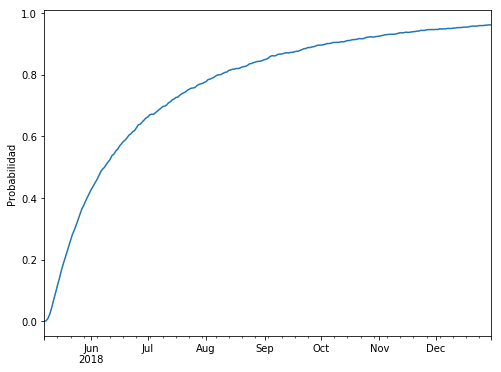

In [58]:
strikeeth = pd.DataFrame(umbraleth*np.ones((ndays,ntraj)),index=dates)
counteth = simdataeth>strikeeth
probeth = counteth.T.sum()/ntraj
probeth.plot(figsize=(8,6),legend=False);
plt.ylabel('Probabilidad')

Este gráfico nos muestra la probablidad de que ETH alcance el umbral a lo largo del tiempo.

## Proyección de precios de cierre Ripple (XRP) Mayo 2018 - Diciembre 2018

Comenzamos en 0.7728 USD por lo tanto nuestro umbral sera 1.082 USD

In [64]:
## Solo para observar el valor máx  simulado en XRP
simdataxrp.values.max()

8579.3051152544122

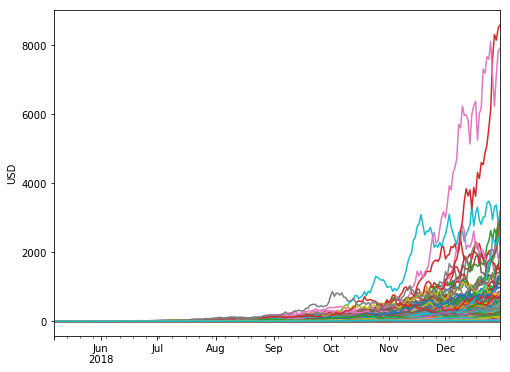

In [59]:
simdataxrp.plot(figsize=(8,6),legend=False);
plt.ylabel('USD')

In [61]:
umbralxrp =0.7728*1.40
dates = pd.date_range('20180507',periods=ndays)
strikexrp = pd.DataFrame({'Strike':umbralxrp*np.ones(ndays)},index=dates)
simulxrp = pd.concat([simdataxrp.T,strike.T]).T

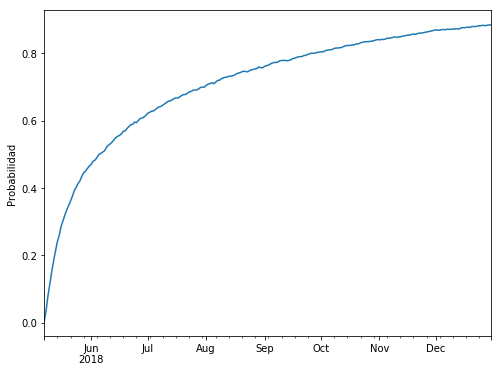

In [71]:
strikexrp = pd.DataFrame(1.082*np.ones((ndays,ntraj)),index=dates)
countxrp = simdataxrp>strikexrp
probxrp = countxrp.T.sum()/ntraj
probxrp.plot(figsize=(8,6),legend=False);
plt.ylabel('Probabilidad')

Este gráfico nos muestra la probablidad de que XRP alcance el umbral a lo largo del tiempo.

## Solo para comparar la paridad USD/MXN Mayo 2018 - Diciembre 2018

Este ejemplo solo lo añadi, ya que me parece interesante comparar las probabilidades de ganar un 40%, sé que sería extraordinario este caso.

Todo esto debido a que muchas personas ven como una inversión atractiva comprar dòlares... 

Pienso que atractiva no, pero "segura".....

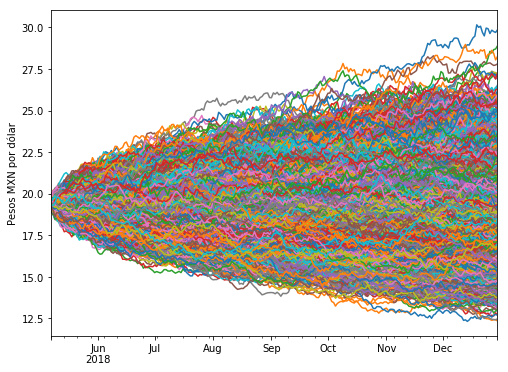

In [68]:
def get_historical_closes(ticker, start_date, end_date=None):
    closes = web.YahooDailyReader(ticker, start_date, end_date).read()
    return pd.DataFrame(closes.loc[:, 'Adj Close'])

ticker = 'MXN=X'
start_date = '2017-01-01'
end_date = '2018-05-07'
closes = get_historical_closes(ticker, start_date, end_date)

def calc_daily_returns(closes):
    return np.log(closes/closes.shift(1)).dropna()
daily_returns = calc_daily_returns(closes)

mu=daily_returns.mean().values[0]
sigma=daily_returns.std().values[0]

def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)
ndays = 238
ntraj = 10000
start_date = '2018-05-07'
simret = daily_ret_sim(mu, sigma, ndays, ntraj, start_date)
simdata=(closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())

simdata.plot(figsize=(8,6),legend=False);
plt.ylabel('Pesos MXN por dólar')

## Visualización del umbral en los precios simulados

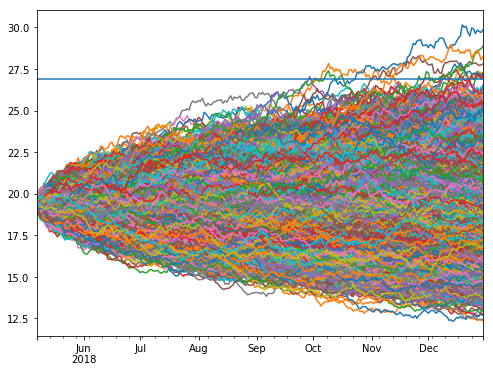

In [73]:
umbralusd = 19.23*1.40
dates = pd.date_range('2018-05-07',periods=ndays)
strike = pd.DataFrame({'Strike':umbralusd*np.ones(ndays)},index=dates)
simul = pd.concat([simdata.T,strike.T]).T
simul.plot(figsize=(8,6),legend=False);

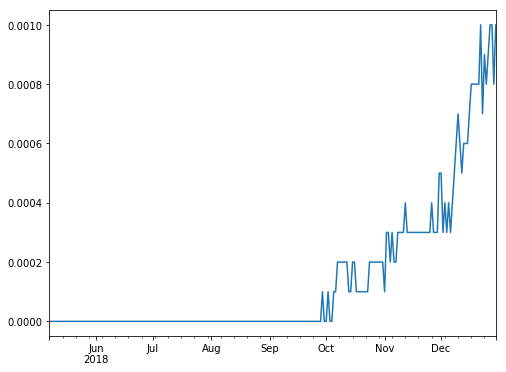

In [74]:
strike = pd.DataFrame(umbralusd*np.ones((ndays,ntraj)),index=dates)
count = simdata>strike
prob = count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

Este gráfico nos muestra la probablidad de que la paridad USD/MXN alcance el umbral a lo largo del tiempo. como podemos observar es practicamente imposible con un 0.10% de probabilidad.

## Conclusiones

Las 3 criptomonedas tienen un comportamiento muy similar entre ellas, por lo tanto, las probabilidades son muy parecidas, solo ETH tiene un poco más.

Es importante considerar que cómo se tomo un rango muy grande de precios y estos activos son altamente volatiles los valores de mu y sigma se ven afectados.


### Referencias:

Jimenez, E. (2018). Probabilidad precio umbral. Mayo, 07 2018, de Jimenez, E Sitio web: https://github.com/esjimenezro/SimMat2018-1/blob/master/Modulo3/Clase21_ProbabilidadPrecioUmbral.ipynb

Microsoft Corp. (MSFT).  BTC-USD, Mayo, 07 2018 de Yahoo! Finance. Sitio web: https://finance.yahoo.com/quote/BTC-USD.

Microsoft Corp. (MSFT).  ETH-USD, Mayo, 07 2018 de Yahoo! Finance. Sitio web: https://finance.yahoo.com/quote/ETH-USD/.

Microsoft Corp. (MSFT).  XRP-USD, Mayo, 07 2018 de Yahoo! Finance. Sitio web: https://finance.yahoo.com/quote/XRP-USD/.

Microsoft Corp. (MSFT).  USD/MXN, Mayo, 07 2018 de Yahoo! Finance. Sitio web: https://finance.yahoo.com/quote/MXN%3DX.

CoinMarketCap.  Cryptocurrency Market Capitalizations, Mayo, 07 2018 de CoinMarketCap. Sitio web: https://coinmarketcap.com/


<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Mario Abel García Verduzco.
</footer>